<a href="https://colab.research.google.com/github/anwholesquare/semester-mark-prediction-model/blob/main/mark_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv("mark.csv")
df.head()

,id,Name,gender,group,preparation rating,CSE1203 Discrete Mathematics score,EEE2142 Electronic Devices and Circuits' score,CSE2200 Software Development I's score,MATH2203 Mathematics IV's score,Admission Fees,Education Level of Parents
0,0,NaN,female,A2,3,72,72,74,63,standard,BD
1,1,NaN,female,A3,5,69,90,88,80,standard,CD
2,2,NaN,female,A2,1,90,95,93,89,standard,master's degree
3,3,NaN,male,A1,4,47,57,44,42,free,associate's degree
4,4,NaN,male,A3,2,76,78,75,84,standard,CD


In [3]:
df["mean score"] = ((df["EEE2142 Electronic Devices and Circuits' score"] + df["EEE2142 Electronic Devices and Circuits' score"] + df["CSE2200 Software Development I's score"] + df["MATH2203 Mathematics IV's score"] ) / 4).round()
df.head()

,id,Name,gender,group,preparation rating,CSE1203 Discrete Mathematics score,EEE2142 Electronic Devices and Circuits' score,CSE2200 Software Development I's score,MATH2203 Mathematics IV's score,Admission Fees,Education Level of Parents,mean score
0,0,NaN,female,A2,3,72,72,74,63,standard,BD,70.0
1,1,NaN,female,A3,5,69,90,88,80,standard,CD,87.0
2,2,NaN,female,A2,1,90,95,93,89,standard,master's degree,93.0
3,3,NaN,male,A1,4,47,57,44,42,free,associate's degree,50.0
4,4,NaN,male,A3,2,76,78,75,84,standard,CD,79.0


In [4]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
df['gender'] = lc.fit_transform(df['gender'])
df['group'] = lc.fit_transform(df['group'])
df['Education Level of Parents'] = lc.fit_transform(df['Education Level of Parents'])
df['Admission Fees'] = lc.fit_transform(df['Admission Fees'])
df['preparation rating'] = lc.fit_transform(df['preparation rating'])
df.head()

,id,Name,gender,group,preparation rating,CSE1203 Discrete Mathematics score,EEE2142 Electronic Devices and Circuits' score,CSE2200 Software Development I's score,MATH2203 Mathematics IV's score,Admission Fees,Education Level of Parents,mean score
0,0,NaN,0,1,3,72,72,74,63,1,0,70.0
1,1,NaN,0,2,5,69,90,88,80,1,1,87.0
2,2,NaN,0,1,1,90,95,93,89,1,4,93.0
3,3,NaN,1,0,4,47,57,44,42,0,3,50.0
4,4,NaN,1,2,2,76,78,75,84,1,1,79.0


In [9]:
#df = df.drop(['Name'],axis = 1)
df = df.drop(["EEE2142 Electronic Devices and Circuits' score", "CSE2200 Software Development I's score", "MATH2203 Mathematics IV's score", "CSE1203 Discrete Mathematics score" ],axis = 1)
df.head()

,id,gender,group,preparation rating,Admission Fees,Education Level of Parents,mean score
0,0,0,1,3,1,0,70.0
1,1,0,2,5,1,1,87.0
2,2,0,1,1,1,4,93.0
3,3,1,0,4,0,3,50.0
4,4,1,2,2,1,1,79.0


<Figure size 864x432 with 0 Axes>

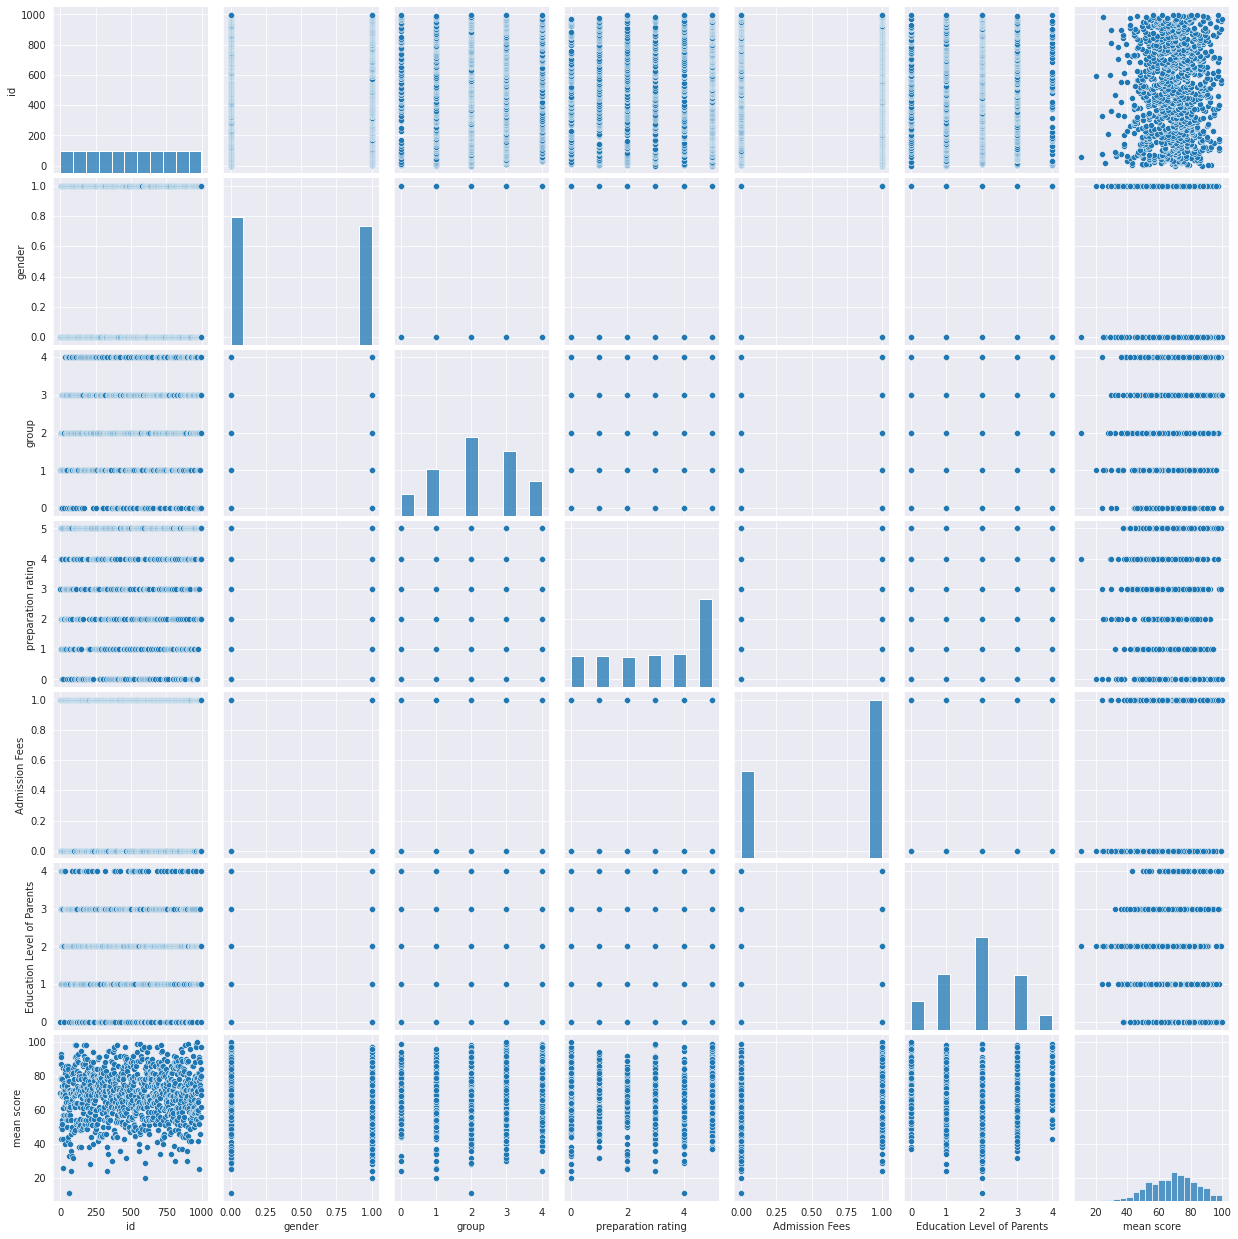

In [10]:
plt.figure(figsize = (12,6))
sns.pairplot(df)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
y = df['mean score']
x = df.drop(['mean score'], axis  = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [14]:
model.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [15]:
predictions = model.predict(x_test)

In [16]:
difference = abs(predictions - y_test)

In [17]:
difference.mean()

12.915